In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as PathEffects

import numpy as np

In [2]:
#mpl.rcParams['figure.dpi'] = 600
mpl.rcParams['figure.dpi'] = 100

/var/folders/q6/pm7mcbgn2m3cs67hqk4fvgf40000gn/T/ipykernel_56595/204979407.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  m = (P2[1] - P1[1]) / (P2[0] - P1[0])
/var/folders/q6/pm7mcbgn2m3cs67hqk4fvgf40000gn/T/ipykernel_56595/204979407.py:37: RuntimeWarning: invalid value encountered in add
  return m * x_range + c


Text(0, 0.5, "$x'$")

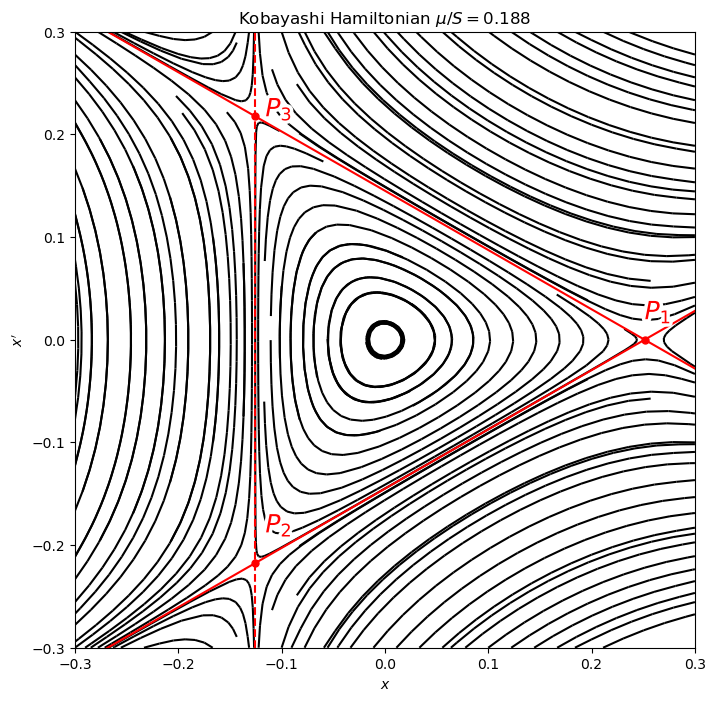

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))

start = -0.3
stop = 0.3

e = 6 * np.pi * 0.001
s = 0.1

xvalues, yvalues = np.meshgrid(np.linspace(start, stop, 500), np.linspace(start, stop, 500))

xdot = e*yvalues + (3/2)*s*xvalues*yvalues

ydot = -1*e*xvalues + (3/4)*s*(xvalues**2 - yvalues**2)
plt.streamplot(xvalues, yvalues, xdot, ydot, density=0.95, color='k', arrowsize=0,  
               broken_streamlines=False, 
               minlength=0.1,
               maxlength=1.5,
               )

P1 = ((4/3)*(e/s), 0)
P2 = (-(2/3)*(e/s), -((2*e)/(np.sqrt(3)*s)))
P3 = (-(2/3)*(e/s), ((2*e)/(np.sqrt(3)*s)))


# plot all points
for point in [P1, P2, P3]:
    plt.plot(point[0], point[1], 'ro', markersize=5)
    # add text
    
def generate_line_parameters(P1, P2):
    m = (P2[1] - P1[1]) / (P2[0] - P1[0])
    c = P1[1] - m * P1[0]
    return m, c

# Function to generate line's y values
def generate_line_y(m, c, x_range):
    return m * x_range + c

txt = ax.text(P1[0] + 0, P1[1] + 0.02, r'$P_1$', color='r', fontsize=18)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

txt = ax.text(P2[0] + 0.01, P2[1] + 0.03, r'$P_2$', color='r', fontsize=18)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])

txt = ax.text(P3[0] + 0.01, P3[1] + 0, r'$P_3$', color='r', fontsize=18)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='w')])


m12, c12 = generate_line_parameters(P1, P2)
m23, c23 = generate_line_parameters(P2, P3)
m31, c31 = generate_line_parameters(P3, P1)

x_range = np.linspace(-1, 1, 100)
y12 = generate_line_y(m12, c12, x_range)
y23 = generate_line_y(m23, c23, x_range)
y31 = generate_line_y(m31, c31, x_range)

ax.plot(x_range, y12, label='Line P1-P2', color='r')
ax.plot(x_range, y31, label='Line P3-P1', color='r')

h = (2/3)*(e/s)

ax.axvline(x=-h, color='r', linestyle='--')

plt.xlim(-0.3, 0.3)
plt.ylim(-0.3, 0.3)

plt.title(r'Kobayashi Hamiltonian $\mu / S=$' + str(round(e/s, 3)))

ax.set_xlabel(r'$x$')
ax.set_ylabel(r"$x'$")


/opt/homebrew/Caskroom/miniconda/base/envs/cern/lib/python3.10/site-packages/matplotlib/patches.py:3328: RuntimeWarning: invalid value encountered in double_scalars
  cos_t, sin_t = head_length / head_dist, head_width / head_dist


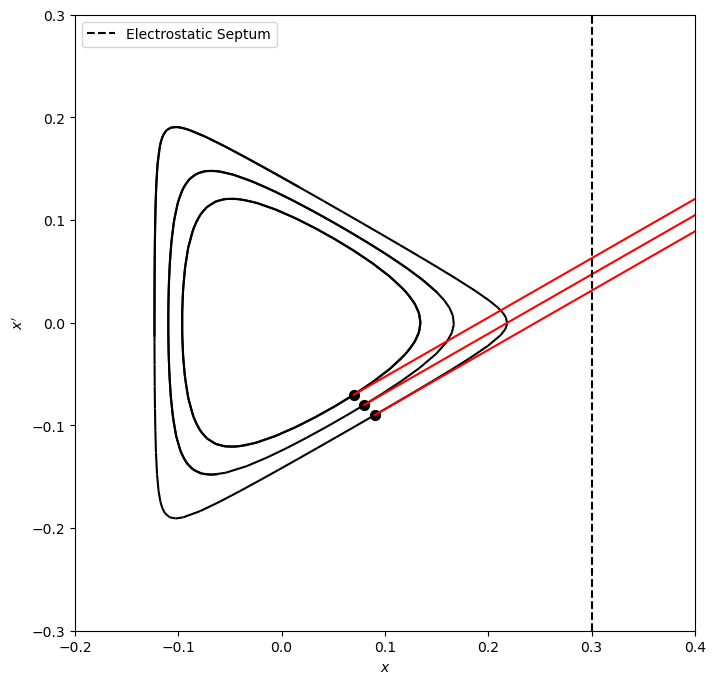

In [65]:
fig, ax = plt.subplots(figsize=(8, 8))

start = -0.3
stop = 0.3

e = 6 * np.pi * 0.001
s = 0.1

xvalues, yvalues = np.meshgrid(np.linspace(start, stop, 500), np.linspace(start, stop, 500))

xdot = e*yvalues + (3/2)*s*xvalues*yvalues

plot1 = [0.07, -0.07]
plot2 = [0.08, -0.08]
plot3 = [0.09, -0.09]

ydot = -1*e*xvalues + (3/4)*s*(xvalues**2 - yvalues**2)
plt.streamplot(xvalues, yvalues, xdot, ydot, density=0.95, color='k', arrowsize=0,  
               broken_streamlines=False, 
               minlength=0.1,
               maxlength=2.5,
               start_points = [plot1, plot2, plot3, 
                               #[0.1, 0.1], [0.1, -0.1], [-0.14, 0]
                               ]
               
               )

P1 = ((4/3)*(e/s), 0)
P2 = (-(2/3)*(e/s), -((2*e)/(np.sqrt(3)*s)))
P3 = (-(2/3)*(e/s), ((2*e)/(np.sqrt(3)*s)))

def generate_line_parameters(P1, P2):
    m = (P2[1] - P1[1]) / (P2[0] - P1[0])
    c = P1[1] - m * P1[0]
    return m, c

# Function to generate line's y values
def generate_line_y(m, c, x_range):
    return m * x_range + c


m12, c12 = generate_line_parameters(P1, P2)

for plotpoint in [plot1, plot2, plot3]:
    ax.scatter(plotpoint[0], plotpoint[1], color='k', s=50)
    x_1 = np.linspace(plotpoint[0], 1, 1000)
    y_1 = plotpoint[1] + m12 * (x_1 - plotpoint[0])
    ax.plot(x_1, y_1, color='r')


plt.xlim(-0.2, 0.4)
plt.ylim(-0.3, 0.3)



ax.axvline(x=0.3, color='k', linestyle='--', label="Electrostatic Septum")


ax.set_xlabel(r'$x$')
ax.set_ylabel(r"$x'$")

ax.legend()

In [43]:
m12

0.5773502691896258